## Problem 3.6

2つの点電荷が半径$a$の球の北極（電荷$+q > 0$）と南極（電荷$-q < 0$）に存在するとき，球の内外のポテンシャルは
$$
\Phi(r, \theta) = \frac{q}{2\pi \epsilon_0} \sum_{l = 1, 3, \ldots}^\infty
\frac{r_<^l}{r_>^{l+1}} P_l(\cos\theta)
$$
とかける．ただし，$r_<, r_>$は$r, a$の小さい方，大きい方である．

In [1]:
##--- common ---##
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate
from matplotlib import cm

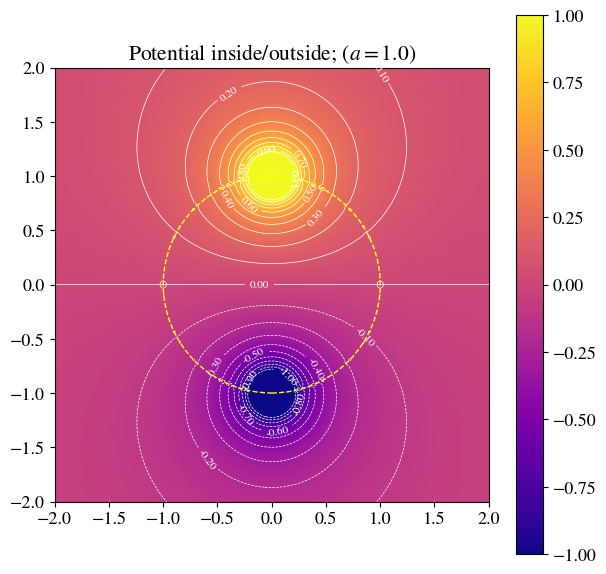

In [23]:
#--- initial condition(s) ---#
NN = 100# number of grids per unit grid
aa = 1.0# radius of sphere
lmax = 80# number of terms



#--- READY ---#
xx = np.linspace(-3,3,NN*6)
yy = np.linspace(-3,3,NN*6)
xx,yy=np.meshgrid(xx,yy)


#--- convert to polar coordinate ---#
rr = np.sqrt(xx**2+yy**2)
##xx = rr*cos(ph), yy = rr*sin(ph)
##→ph = atan(yy/xx)
th = np.arctan2(xx,yy)
ph = (ph + 2*np.pi)%(2*np.pi)# convert to [0,2π] from [-π,π]
cos_th = np.cos(th)

#--- calculation ---#

phi_in = np.full_like(xx,0.0, dtype=np.float64)
phi_out = np.full_like(xx,0.0, dtype=np.float64)


for l in range(1,lmax+1, 2):
    P_l = sp.legendre(l)
    phi_in += 0.5 * rr**l / aa**(l+1) * P_l(cos_th)
    phi_out += 0.5 * aa**l / rr**(l+1) * P_l(cos_th)



#--- drawing ---#
fig = plt.figure(figsize=(7,7))
plt.rcParams['font.size']=13
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['mathtext.fontset']='stix'

ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
tle = "Potential inside/outside; " + r"($a = 1.0$)"
ax.set_title(tle)



phi = np.where(rr <= aa, phi_in, phi_out)

sphere = plt.Circle((0, 0), aa, fill=False, edgecolor='yellow', zorder=10, linestyle='--')
ax.add_artist(sphere)


mesh=ax.pcolormesh(xx,yy,phi,cmap='plasma',vmin=-1,vmax=1)
plt.colorbar(mesh)
cnt = ax.contour(xx,yy,phi,colors='white',linewidths=0.5,levels=np.linspace(-1,1,21))

ax.clabel(cnt,inline=1,fontsize=8,fmt='%.2f')

plt.savefig('3-6(a).png', dpi=300)
plt.show()

(c)では，dipoleと接地された球によるポテンシャルを考える．

$$
\Phi(r, \theta) = \frac{p}{4\pi \epsilon_0} \left( \frac{1}{r^2} - \frac{r}{b^3}\right)\cos\theta
$$

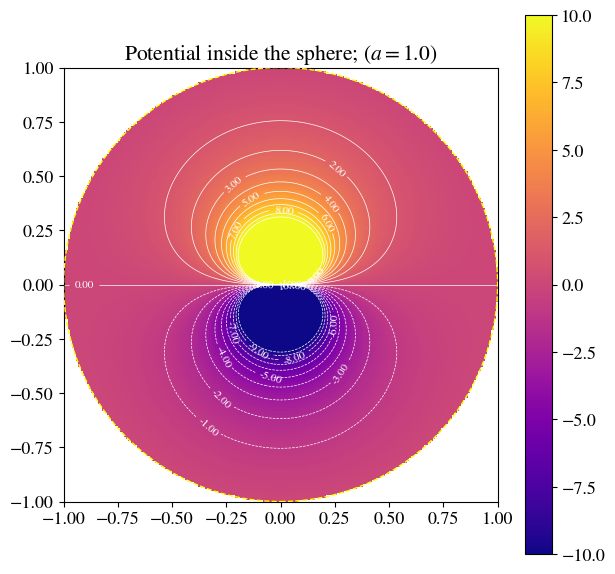

In [58]:
#--- initial condition(s) ---#
NN = 100# number of grids per unit grid
aa = 0.001# radius of sphere
bb = 1.00
lmax = 80# number of terms



#--- READY ---#
xx = np.linspace(-3,3,NN*6)
yy = np.linspace(-3,3,NN*6)
xx,yy=np.meshgrid(xx,yy)


#--- convert to polar coordinate ---#
rr = np.sqrt(xx**2+yy**2)
##xx = rr*cos(ph), yy = rr*sin(ph)
##→ph = atan(yy/xx)
th = np.arctan2(xx,yy)
ph = (ph + 2*np.pi)%(2*np.pi)# convert to [0,2π] from [-π,π]
cos_th = np.cos(th)

#--- calculation ---#

phi = np.full_like(xx,0.0, dtype=np.float64)


phi = (1/rr**2 - rr/bb**3) * cos_th
    



#--- drawing ---#
fig = plt.figure(figsize=(7,7))
plt.rcParams['font.size']=13
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['mathtext.fontset']='stix'

ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
tle = "Potential inside the sphere; " + r"($a = 1.0$)"
ax.set_title(tle)



phi = np.where(rr <= bb, phi, np.nan)

sphere = plt.Circle((0, 0), bb, fill=False, edgecolor='yellow', zorder=10, linestyle='--')
ax.add_artist(sphere)


mesh=ax.pcolormesh(xx,yy,phi,cmap='plasma',vmin=-10,vmax=10)
plt.colorbar(mesh)
cnt = ax.contour(xx,yy,phi,colors='white',linewidths=0.5,levels=np.linspace(-10,10,21))

ax.clabel(cnt,inline=1,fontsize=8,fmt='%.2f')

#plt.savefig('3-6(c).png', dpi=300)
plt.show()